In [1]:
import random
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

In [74]:
class KMeans():
    def __init__(self,*,n_clusters, init='k-means++', max_iter=300, threshold=1e-4):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.threshold = threshold
    
    def init_centroids(self,X):
        if self.init=='random':
            centroids_idx = random.sample(range(0, X.shape[0]), self.n_clusters)
            centroids = X[centroids_idx]
        elif self.init=='k-means++':
            pass
        return centroids
    
    def fit(self,X):
        convergence = False
        n_iter=0
        while not convergence and n_iter <self.max_iter:
            n_iter = n_iter+1
            print(n_iter)
            if (n_iter==1) :
                # centroid initialization
                centroids = self.init_centroids(X)
            else:
                # get index
                n_feature = X.shape[1]
                centroids = np.zeros((self.n_clusters,n_feature))
                for cl in range(self.n_clusters):
                    idx=[i for i in range(X.shape[0]) if label[i]==cl] 
                    centroids[cl] = np.mean(X[idx],axis=0)
            distance_to_centroids = euclidean_distances(X,centroids)
            min_distance = np.amin(distance_to_centroids, axis=1)
            label = np.argmin(distance_to_centroids, axis=1)
            # calculate Mean Squared Error
            mse = np.square(min_distance).sum()
            if (mse<self.threshold):
                convergence = True
        self.centroids = centroids
    
    def predict(self,X):
        if self.centroids is None:
            raise ValueError("Fit data first!")
        else:
            distance_to_centroids = euclidean_distances(X,self.centroids)
            label = np.argmin(distance_to_centroids, axis=1)
        return label

## Data Iris

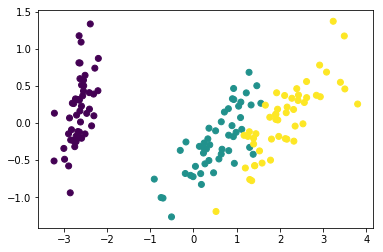

In [72]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris_dataset = datasets.load_iris()
iris_data = iris_dataset.data
iris_target = iris_dataset.target
pca = PCA(n_components=2)
pca.fit(iris_data)
iris_pca = pca.transform(iris_data)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris_target)
plt.show()

Hasil clustering Scikit KMeans
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


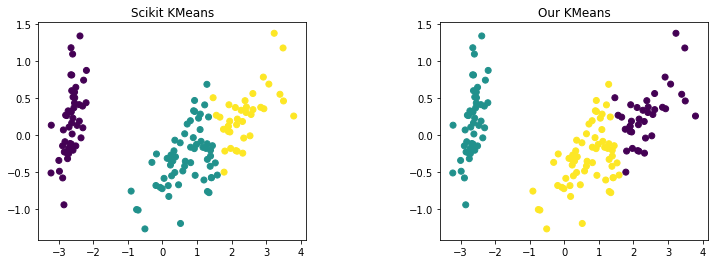

In [75]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(iris_data)
sk_label = km.labels_
print("Hasil clustering Scikit KMeans")
print(sk_label)

km = KMeans(n_clusters=3,init='random').fit(iris_data)
label = km.predict(iris_data)
print(label)


pca = PCA(n_components=2)
pca.fit(iris_data)
iris_pca = pca.transform(iris_data)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=sk_label)
plt.title("Scikit KMeans")
plt.subplot(1, 2, 2)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=label)
plt.title("Our KMeans")
plt.show()

In [76]:
data = np.array([[0,0],[1,1],[0,1],[1,0],[7,7],[7,8],[8,7],[8,8]])
# data = np.array([1,2,3,4,5])
km = KMeans(n_clusters=2,init='random')
km.fit(data)
print(km)
result = km.predict(data)
print(result)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[0 0 0 0 1 1 1 1]


In [58]:
km.n_iter

AttributeError: 'KMeans' object has no attribute 'n_iter'

In [46]:
centroids  = np.array([[2,2],[4,4],[8,8]])
X = np.array([[8,8],[1,1],[2,2],[3,3],[4,4]])
distance_to_centroids = euclidean_distances(X,centroids)
label = np.argmin(distance_to_centroids, axis=1)
print('dist',distance_to_centroids)
print('label',label)


n_clusters=3
n_feature = X.shape[1]
print(n_feature)
centroids = np.zeros((n_clusters,n_feature))
for cl in range(n_clusters):
    idx=[i for i in range(label.shape[0]) if label[i]==cl] 
    print('anggota', X[idx])
    centroids[cl] = np.mean(X[idx],axis=0)
print(centroids)

dist [[8.48528137 5.65685425 0.        ]
 [1.41421356 4.24264069 9.89949494]
 [0.         2.82842712 8.48528137]
 [1.41421356 1.41421356 7.07106781]
 [2.82842712 0.         5.65685425]]
label [2 0 0 0 1]
2
anggota [[1 1]
 [2 2]
 [3 3]]
anggota [[4 4]]
anggota [[8 8]]
[[2. 2.]
 [4. 4.]
 [8. 8.]]


In [13]:
for i in range(X.shape[0]):
    print(i)
    print(X[i])

0
[0 0]
1
[1 1]
2
[2 2]
3
[3 3]
4
[4 4]


In [43]:
y=np.array([1,2,3,4,5,2,3])
z = np.square(y).sum()
print(z)
idx=[i for i in range(y.shape[0]) if y[i]==2]
print(idx)
print(np.mean(y[idx]))
a=np.zeros()
a[2]=np.array([2,3,4])

68
[1, 5]
2.0


IndexError: index 2 is out of bounds for axis 0 with size 0

In [39]:
X = np.array([[0,0],[1,1],[0,1],[1,0],[7,7],[7,8],[8,7],[8,8]])
idx = [1,2,3]
a = X[idx]
print (a)

[[1 1]
 [0 1]
 [1 0]]
